In [1]:
from selenium import  webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.Chrome(executable_path='C:/Users/ahima/Desktop/chromedriver.exe')

#  Login to instagram first

In [ ]:
driver.get('https://www.instagram.com/accounts/login/')
sleep(4)
text_username = driver.find_element_by_name('username')
text_username.send_keys('username')
sleep(2)
text_pass = driver.find_element_by_name('password')
text_pass.send_keys('password')
sleep(2)
text_pass.submit()
sleep(5)
save_info = driver.find_element_by_tag_name('button')
save_info.click()
sleep(10)
notification = driver.find_element(By.XPATH,'/html/body/div[6]/div/div/div/div[3]/button[1]')
notification.click()

# 
Q1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
Now Find the number of posts these handles have done in the previous 3 days.
Depict this information using a suitable graph.

In [39]:

# In this cell we will  Open the first 10 handles and find the top 5 which have the highest number of followers
import operator
search = driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
search.send_keys('food')
sleep(3)
allpages=driver.find_elements_by_class_name('-qQT3')
a = 1
food_handles = []
for i in allpages:
    if a == 11:
        break
    if i.text[0]!='#': # Printing the usernames without '#' (hashtag) symbol
        food_handles.append(i.text.split('\n')[0])
    a+=1
cross_btn = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]')
cross_btn.click()
sleep(2)
d = {} #dictionary containing username and the no.of their followers

for ele in food_handles:
    search = driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys(ele)
    sleep(3)
    page = driver.find_element_by_class_name('-qQT3')
    page.click()
    sleep(10)

    follower_path = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/div/span')
    follower_no = follower_path.get_attribute('outerHTML').split(' ')[3].split('"')[1]
    follower_no = int(''.join(follower_no.split(',')))
    d[ele] = follower_no
    sleep(2)
    driver.back()
    sleep(3)
d['food'] = 176733
sorted_d = dict(sorted(d.items(),key = operator.itemgetter(1),reverse = True))
count = 1
for ele in sorted_d:
    if count == 6:
        break
    print(ele,sorted_d[ele])
    count+=1


foodie_incarnate 1320053
dilsefoodie 1016493
foodtalkindia 308598
food 176733
foodranchi 110357


In [106]:
#Now we will try to find the number of posts these handles have done in the previous 3 days.
f = {}# dictionary which will have username and nos. of post they have done in past three days
h = 1
for ele in sorted_d:
    if h == 6:
        break
    search = driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys(ele)
    sleep(3)
    page = driver.find_element_by_class_name('-qQT3')
    page.click()
    sleep(10)
    no_of_post = 0
    count = 0
    post = driver.find_elements_by_class_name('_9AhH0')
    for i in post:
        sleep(3)
        i.click()
        sleep(9)
        post_detail = driver.find_element_by_class_name('_1o9PC')
        d = post_detail.get_attribute('outerHTML').split(' ')
        month = d[3].split('"')[1]
        day = int(d[4].split(',')[0])
        year = int(d[5].split('"')[0])
        sleep(2)
        if day < 20  :
            break
        else:
            count+=1
        driver.back()
        driver.execute_script('window.scrollBy(0,100);')
    f[ele] = count
    h +=1
    driver.back()
    sleep(2)
    driver.back()
    sleep(3)
f['food'] = 6
print(f)
    

{'foodie_incarnate': 3, 'dilsefoodie': 7, 'foodtalkindia': 3, 'food': 6, 'foodranchi': 2}


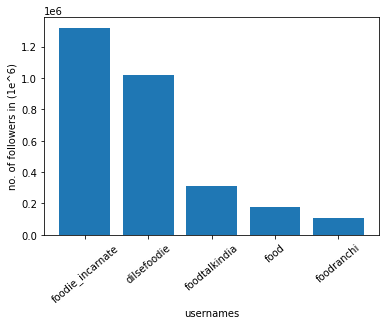

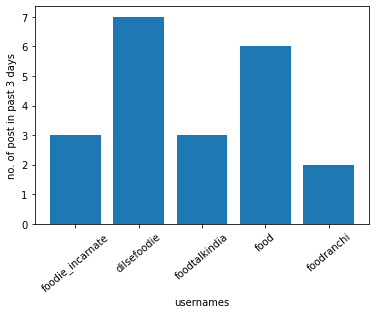

In [118]:
# In this cell we will plot the graph
import matplotlib.pyplot as plt
arr_username = []
arr_no_of_followers = []
arr_no_of_post = []
b =1
for i in sorted_d:
    if b==6:
        break
    arr_username.append(i)
    arr_no_of_followers.append(sorted_d[i])
    arr_no_of_post.append(f[i])
    b+=1
plt.bar(arr_username,arr_no_of_followers)
plt.xticks(rotation = 40)
plt.xlabel('usernames')
plt.ylabel('no. of followers in (1e^6)')
plt.show()
plt.bar(arr_username,arr_no_of_post)
plt.xticks(rotation = 40)
plt.xlabel('usernames')
plt.ylabel('no. of post in past 3 days')
plt.show()

# Q.2 Your friend also needs a list of hashtags that he should use in his posts.

In [158]:
# getting the contents of each post
list_of_words = []
h=1
for ele in sorted_d:
    if h == 6:
        break
    search = driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys(ele)
    sleep(3)
    page = driver.find_element_by_class_name('-qQT3')
    page.click()
    sleep(10)
    no_of_post = 0
    count = 0
    post = driver.find_elements_by_class_name('_9AhH0')
    countt = 1
    for i in post:
        if countt == 11:
            break
        sleep(3)
        i.click()
        sleep(9)
        content = driver.find_element_by_xpath('/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
        for word in content.text.split(' '):
            list_of_words.append(word)
        driver.back()
        driver.execute_script('window.scrollBy(0,100);')
        countt+=1
    h +=1
    driver.back()
    sleep(2)
    sleep(3)
print(list_of_words)

['Internet', 'Sensation', 'VOLCANO', 'PANIPURI', 'of', 'Surat🤩🤩\n.\nKindly', 'watch', 'the', 'full', 'video', 'for', 'location,', 'price', 'and', 'other', 'details🤗🤗\n.\n#foodieincarnate', '#sodelhi', '#newdelhi', '#foodtalkindia', '#delhigram', '#indianfood', '#delhifoodblogger', '#foodgasm', '#foodporn', '#foodpornshare', '#foodlover', '#foodgram', '#foodiesofinstagram', '#foodie', '#indianstreetfood', '#streetfood', '#delhistreetfood', '#streetfoodindia', '#mumbaistreetfood', '#delhifoodie', '#foodblogger', '#indianfoodie', '#desikhana', '#indianfoodblogger', '#indianfoodbloggers', '#delhifood', '#mumbai', '#delhi', '#surat', '#panipuri', 'Coconut', 'Mango', 'Shake', 'from', 'Mumbai🥥🥭\n.\n#foodieincarnate', '#Reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#mangoshake', '#mango', '#viralfood', '#trending', '#coconutwater', '#explore', 'ऐसी', 'Unique', 'Drink', 'आपने', 'Kabhi', 'Nahi', 'Dekhi', 'Hogi😱😱', 'Can', 'you', 'guess', 'the', 'name??\n.\nWatch', 'the', 'full

In [169]:
#counting frequency of each word
for a in list_of_words:
    if a in d:
        d[a]+=1
    else:
        d[a]=1
word_frequency=[]
for i in d:
    word_frequency.append([i,d[i]])
print(word_frequency) 

[['Internet', 1], ['Sensation', 1], ['VOLCANO', 1], ['PANIPURI', 1], ['of', 55], ['Surat🤩🤩\n.\nKindly', 1], ['watch', 5], ['the', 95], ['full', 7], ['video', 7], ['for', 27], ['location,', 3], ['price', 4], ['and', 65], ['other', 3], ['details🤗🤗\n.\n#foodieincarnate', 3], ['#sodelhi', 3], ['#newdelhi', 5], ['#foodtalkindia', 6], ['#delhigram', 4], ['#indianfood', 5], ['#delhifoodblogger', 8], ['#foodgasm', 3], ['#foodporn', 4], ['#foodpornshare', 3], ['#foodlover', 4], ['#foodgram', 3], ['#foodiesofinstagram', 3], ['#foodie', 3], ['#indianstreetfood', 3], ['#streetfood', 3], ['#delhistreetfood', 3], ['#streetfoodindia', 3], ['#mumbaistreetfood', 3], ['#delhifoodie', 3], ['#foodblogger', 6], ['#indianfoodie', 3], ['#desikhana', 3], ['#indianfoodblogger', 6], ['#indianfoodbloggers', 4], ['#delhifood', 3], ['#mumbai', 4], ['#delhi', 3], ['#surat', 2], ['#panipuri', 1], ['Coconut', 1], ['Mango', 1], ['Shake', 1], ['from', 16], ['Mumbai🥥🥭\n.\n#foodieincarnate', 1], ['#Reelitfeelit', 5], ['#

In [171]:
# Creating Dataframe and also csv
import pandas as pd
df = pd.DataFrame(word_frequency,columns=['Words','Frequency']) # Function to make dataframe with columns as Words and Frequency
df.to_csv('Words.csv',index=False)
df=df[df['Words'].str.startswith('#')] 
popular_hashtags=df.sort_values('Frequency',ascending=False)[0:10]
popular_hashtags.reset_index(drop=True,inplace=True)
print(popular_hashtags)

                Words  Frequency
0   #delhifoodblogger          8
1        #dilsecouple          7
2     #reelsinstagram          6
3  #indianfoodblogger          6
4      #foodtalkindia          6
5        #foodblogger          6
6           #newdelhi          5
7              #reels          5
8       #Reelitfeelit          5
9   #reelkarofeelkaro          5


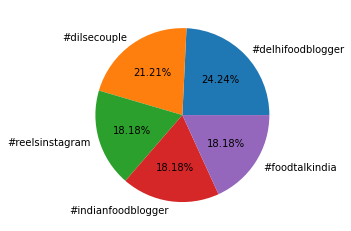

In [172]:
#plotting pie chart
import matplotlib.pyplot as plt
top5_hashtags=popular_hashtags.Words[0:5]
top5_hashtags_frequency=popular_hashtags.Frequency[0:5]
plt.pie(top5_hashtags_frequency,labels=top5_hashtags,autopct="%.2f%%")
plt.show()

#Q.3 we need to calculate average followers : likes ratio for the obtained handles.


In [71]:
#Find out the likes of the top 10 posts of the 5 handles obtained earlier
dic = {} #for username and their total like in top 10 post
from selenium.common.exceptions import NoSuchElementException
for ele in sorted_d:
    total_like = 0
    search = driver.find_element(By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input')
    search.send_keys(ele)
    sleep(3)
    page = driver.find_element_by_class_name('-qQT3')
    page.click()
    sleep(10)
    no_of_post = 0
    count = 0
    post = driver.find_elements_by_class_name('_9AhH0')
    countt = 1
    for i in post:
        if countt == 11:
            break
        sleep(3)
        i.click()
        sleep(9)
#Here I have used try and except because some of the post has views only not the likes so code under the except functinality helps to extract the number of the likes in this particular case
        try:
            sd = driver.find_element_by_xpath('/html/body/div[6]/div[3]/div/article/div/div[3]/div/div/section[2]/div/div/div/a/div')
            like_1 = sd.get_attribute('outerHTML').split(' ')[33].split('<span>')[1].split('<')[0]
            like_1 = int(''.join(like_1.split(',')))
            total_like += like_1
        except NoSuchElementException:
            views = driver.find_element_by_xpath('/html/body/div[6]/div[3]/div/article/div/div[3]/div/div/section[2]/div/span/div')
            views.click()
            sleep(2)
            ds = driver.find_element_by_xpath('/html/body/div[6]/div[3]/div/article/div/div[3]/div/div/section[2]/div/div/div[4]')
            likes =  ds.get_attribute('outerHTML').split('<span>')[1].split('<')[0]
            likes =  int(''.join(likes.split(',')))
            total_like += likes
        dic[ele] = total_like
        driver.back()
        driver.execute_script('window.scrollBy(0,100);')
        countt+=1
    driver.back()
    sleep(2)
    sleep(3)


{'foodie_incarnate': 317743, 'dilsefoodie': 415255, 'foodtalkindia': 307845, 'food': 425888, 'foodranchi': 15854}


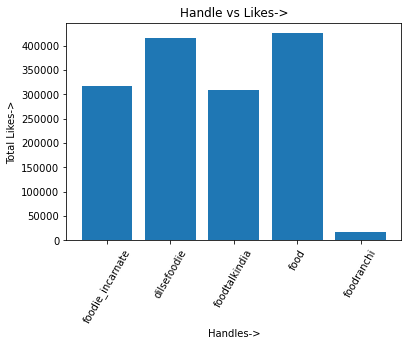

In [75]:
#plotting graph between total likes and handle name
import matplotlib.pyplot as plt
usernames =[]
t_likes = []
for ele in dic:
    usernames.append(ele)
    t_likes.append(dic[ele])
plt.bar(usernames,t_likes)
plt.xticks(rotation=60)
plt.xlabel('Handles->')
plt.ylabel('Total Likes->')
plt.title('Handle vs Likes->')
plt.show()

In [78]:
# Calculating the avg likes by dividing the total likes by 10 and printing it....!
avg_likes=[]
for i in t_likes:
    avg_likes.append(i/10)
for i in range(len(usernames)):
    print(usernames[i],avg_likes[i])  

foodie_incarnate 31774.3
dilsefoodie 41525.5
foodtalkindia 30784.5
food 42588.8
foodranchi 1585.4


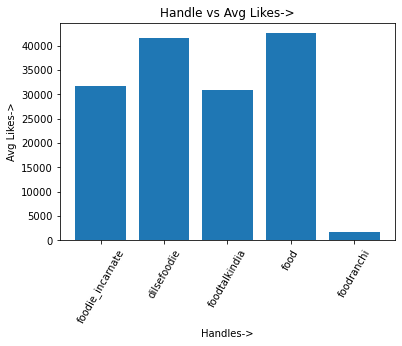

In [79]:
# Plotting a graph between handles and their avg likes
import matplotlib.pyplot as plt
plt.bar(usernames,avg_likes)
plt.xticks(rotation=60)
plt.xlabel('Handles->')
plt.ylabel('Avg Likes->')
plt.title('Handle vs Avg Likes->')
plt.show()

In [83]:
#Calculating followers:likes ratio of the top5 handles
ratio=[]
for i in range(len(usernames)):
    ratio.append(arr_no_of_followers[i]/avg_likes[i])
for i in range(len(usernames)):
    print(usernames[i],ratio[i])

foodie_incarnate 41.544676043217315
dilsefoodie 24.478766059409278
foodtalkindia 10.024460361545582
food 4.149752986700729
foodranchi 69.60830074429165


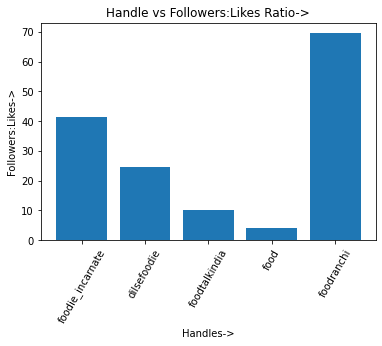

In [85]:
# Plotting a graph between handles and their followers:likes ratio
import matplotlib.pyplot as plt
plt.bar(usernames,ratio)
plt.xticks(rotation=60)
plt.xlabel('Handles->')
plt.ylabel('Followers:Likes->')
plt.title('Handle vs Followers:Likes Ratio->')
plt.show()